# PCA and clustering with single cell RNAseq gene expression data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

Single-cell RNA-seq dataset for mouse tissue.

Download dataset from https://github.com/chanzuckerberg/scRNA-python-workshop/blob/master/content/data.zip

You will need two files in the downloadedd `data` folder:
* brain_counts.csv
* brain_metadata.csv

In [2]:
# rows are cells, columns are genes, values reflect the amount of detected RNA
data = pd.read_csv('data/brain_counts.csv', index_col=0)
data

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1.MAA000560.3_10_M.1.1,0,348,0,0,0,5,0,0,0,0,...,0,0,0,0,0,195,0,0,113,0
A1.MAA000564.3_10_M.1.1,0,41,36,0,0,24,0,0,0,14,...,0,0,0,0,125,0,1,0,0,0
A1.MAA000923.3_9_M.1.1,0,53,0,0,0,0,0,0,0,0,...,0,0,0,81,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,0,111,0,0,32,55,63,0,0,0,...,0,0,0,0,4,12,64,0,3,0
P9.MAA000930.3_8_M.1.1,0,223,2,0,0,49,0,0,0,0,...,0,0,0,10,1,50,2,0,0,0
P9.MAA000932.3_11_M.1.1,0,135,41,0,0,0,0,0,0,0,...,0,19,0,0,18,0,0,0,45,0
P9.MAA000935.3_8_M.1.1,0,129,54,0,0,209,0,0,0,0,...,0,0,0,1,0,0,0,0,57,0


In [3]:
data.shape

(3401, 23433)

In [4]:
# metadata for each cell
meta = pd.read_csv('data/brain_metadata.csv', index_col=0)
meta

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923
...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,oligodendrocyte precursor cell,Cortex,M,3_9_M,MAA000926
P9.MAA000930.3_8_M.1.1,astrocyte,Cortex,M,3_8_M,MAA000930
P9.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932


In [5]:
data.shape, meta.shape

((3401, 23433), (3401, 5))

In [6]:
pd.value_counts(meta.subtissue)

Cortex         1149
Hippocampus     976
Striatum        723
Cerebellum      553
Name: subtissue, dtype: int64

In [7]:
pd.value_counts(meta.cell_ontology_class)

oligodendrocyte                   1574
endothelial cell                   715
astrocyte                          432
neuron                             281
oligodendrocyte precursor cell     203
brain pericyte                     156
Bergmann glial cell                 40
Name: cell_ontology_class, dtype: int64

Let's represent each cell by only two weighted mixtures of gene expression profiles.

In [8]:
from sklearn.decomposition import PCA

X = data.to_numpy()

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

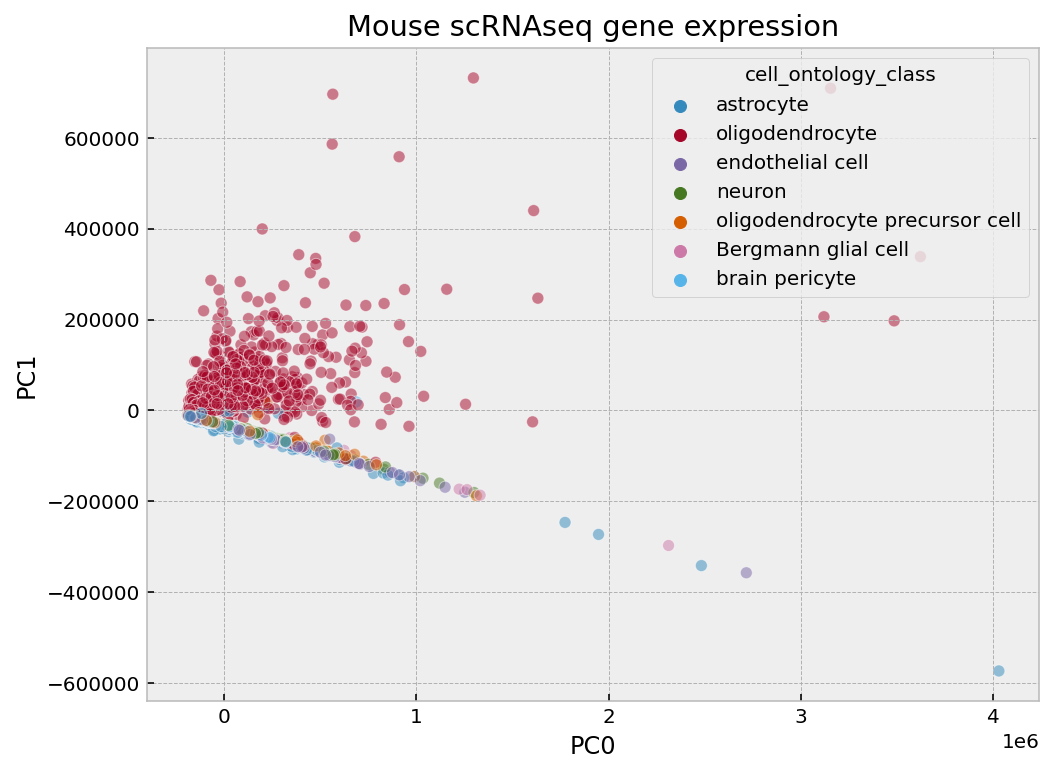

In [9]:
import seaborn as sns

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.5, hue=meta.cell_ontology_class)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Mouse scRNAseq gene expression');

Looks like perhaps we could differentiate oligodendrocytes from other cell types base on their gene expression profiles, but not much else.

Let's take a closer look at the data before we give up.

Total number of counts detected per cell.

In [10]:
data.T.sum()

A1.B003290.3_38_F.1.1       390075
A1.B003728.3_56_F.1.1       776439
A1.MAA000560.3_10_M.1.1    1616087
A1.MAA000564.3_10_M.1.1     360004
A1.MAA000923.3_9_M.1.1      290282
                            ...   
P9.MAA000926.3_9_M.1.1      252305
P9.MAA000930.3_8_M.1.1      424554
P9.MAA000932.3_11_M.1.1     454857
P9.MAA000935.3_8_M.1.1      711797
P9.MAA001894.3_39_F.1.1     130251
Length: 3401, dtype: int64

Total number of genes detected per cell.

In [11]:
(data > 0).T.sum()

A1.B003290.3_38_F.1.1      3359
A1.B003728.3_56_F.1.1      1718
A1.MAA000560.3_10_M.1.1    3910
A1.MAA000564.3_10_M.1.1    4352
A1.MAA000923.3_9_M.1.1     2248
                           ... 
P9.MAA000926.3_9_M.1.1     3982
P9.MAA000930.3_8_M.1.1     5047
P9.MAA000932.3_11_M.1.1    3557
P9.MAA000935.3_8_M.1.1     2920
P9.MAA001894.3_39_F.1.1    1483
Length: 3401, dtype: int64

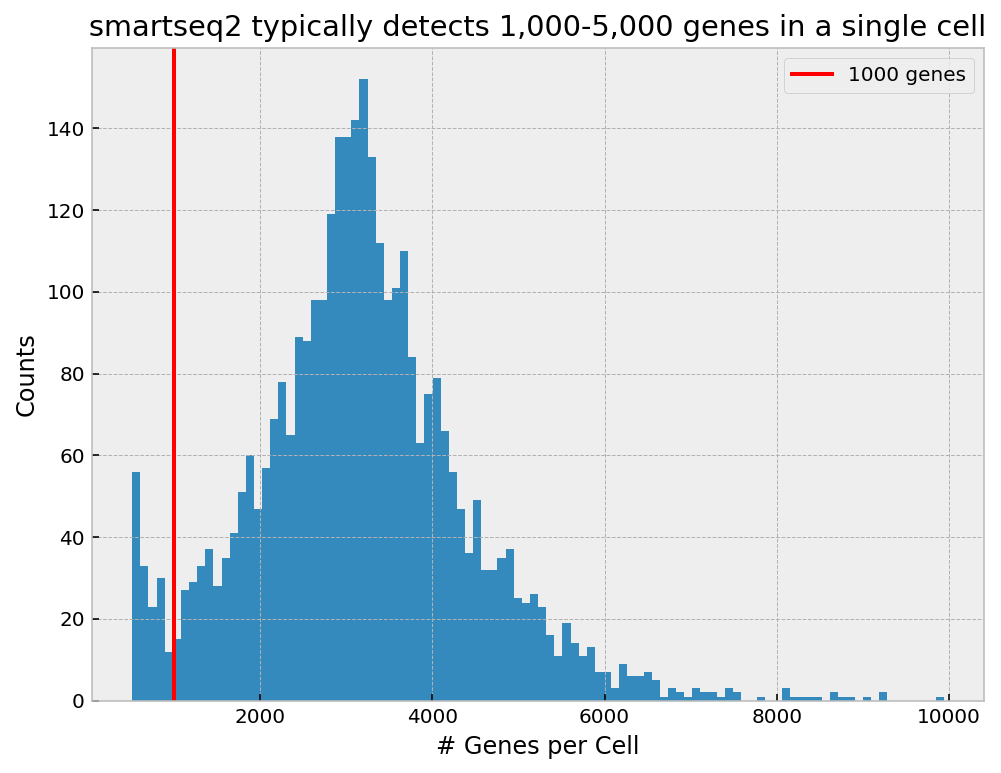

In [12]:
num_genes_per_cell = (data > 0).T.sum()
plt.hist(num_genes_per_cell, 100)
plt.axvline(1000, color='r', label='1000 genes')
plt.xlabel('# Genes per Cell')
plt.ylabel('Counts')
plt.title('smartseq2 typically detects 1,000-5,000 genes in a single cell')
plt.legend();

Remove cells with fewer than 1000 genes detected as these may reflect bad reads.

In [13]:
row_mask = num_genes_per_cell >= 1000
data_ok = data[row_mask]
meta_ok = meta[row_mask]

data.shape, data_ok.shape, meta_ok.shape

((3401, 23433), (3246, 23433), (3246, 5))

A gene is considered detectable if at least two cells contain more than 5 reads from the gene. Remove undetected genes.

In [14]:
is_detected = ((data_ok > 5).sum() >= 2)
is_detected

0610005C13Rik         True
0610007C21Rik         True
0610007L01Rik         True
0610007N19Rik         True
0610007P08Rik         True
                     ...  
Zzef1                 True
Zzz3                  True
a                     True
l7Rn6                 True
zsGreen_transgene    False
Length: 23433, dtype: bool

In [15]:
print(data_ok.shape)

data_ok = data_ok.T[is_detected].T

data_ok.shape

(3246, 23433)


(3246, 17689)

normalize counts in each cell to counts per million (CPM)

In [16]:
data_ok = (data_ok.T / data_ok.T.sum() * 1e6).T
data_ok

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B14Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6
A1.B003290.3_38_F.1.1,0.0,320.454481,41.018174,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,138.436336
A1.B003728.3_56_F.1.1,0.0,0.000000,0.000000,0.0,0.000000,417.293465,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
A1.MAA000560.3_10_M.1.1,0.0,215.335475,0.000000,0.0,0.000000,3.093900,0.000000,0.0,0.000000,195.534512,...,164.595507,0.0,0.0,0.000000,0.000000,0.000000,120.662119,0.000000,0.0,69.922151
A1.MAA000564.3_10_M.1.1,0.0,113.888256,99.999444,0.0,0.000000,66.666296,0.000000,0.0,38.888673,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,347.220293,0.000000,2.777762,0.0,0.000000
A1.MAA000923.3_9_M.1.1,0.0,182.582963,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,279.041887,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,0.0,439.943719,0.000000,0.0,126.830622,217.990131,249.697786,0.0,0.000000,47.561483,...,241.770873,0.0,0.0,0.000000,0.000000,15.853828,47.561483,253.661243,0.0,11.890371
P9.MAA000930.3_8_M.1.1,0.0,525.257093,4.710826,0.0,0.000000,115.415236,0.000000,0.0,0.000000,54.174498,...,167.234321,0.0,0.0,0.000000,23.554130,2.355413,117.770649,4.710826,0.0,0.000000
P9.MAA000932.3_11_M.1.1,0.0,296.797881,90.138616,0.0,0.000000,0.000000,0.000000,0.0,0.000000,59.359576,...,0.000000,0.0,0.0,41.771554,0.000000,39.573051,0.000000,0.000000,0.0,98.932627
P9.MAA000935.3_8_M.1.1,0.0,181.231701,75.864433,0.0,0.000000,293.623454,0.000000,0.0,0.000000,82.888918,...,0.000000,0.0,0.0,0.000000,1.404897,0.000000,0.000000,0.000000,0.0,80.079124


Now that the data has been cleaned up a bit, let's project the 17,689 dimensional gene expression profile of each cell onto two dimensions for simple visualization.

In [17]:
X = data_ok.to_numpy()

pca = PCA(2)
pca.fit(X)

PCA(n_components=2)

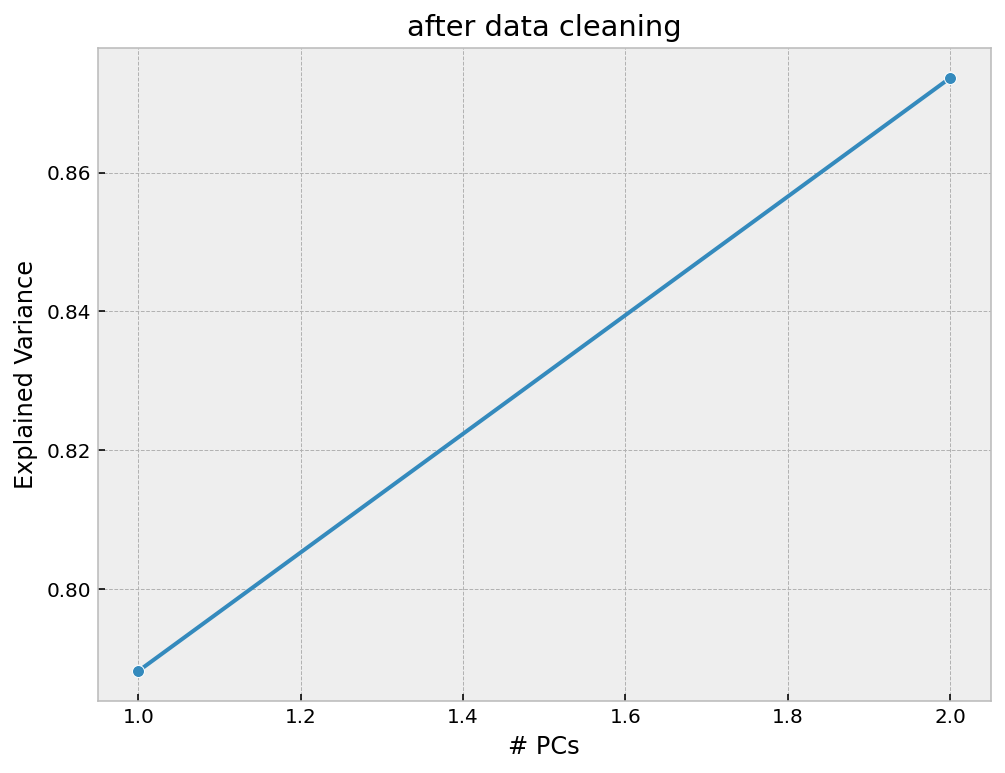

In [18]:
numPC = np.arange(1, pca.n_components_ + 1)
plt.plot(numPC, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('# PCs')
plt.ylabel('Explained Variance')
plt.title('after data cleaning');

The data appears a bit better separated in the first two principal components, but we probably still cannot distinguish cells apart from oligodendrocytes.

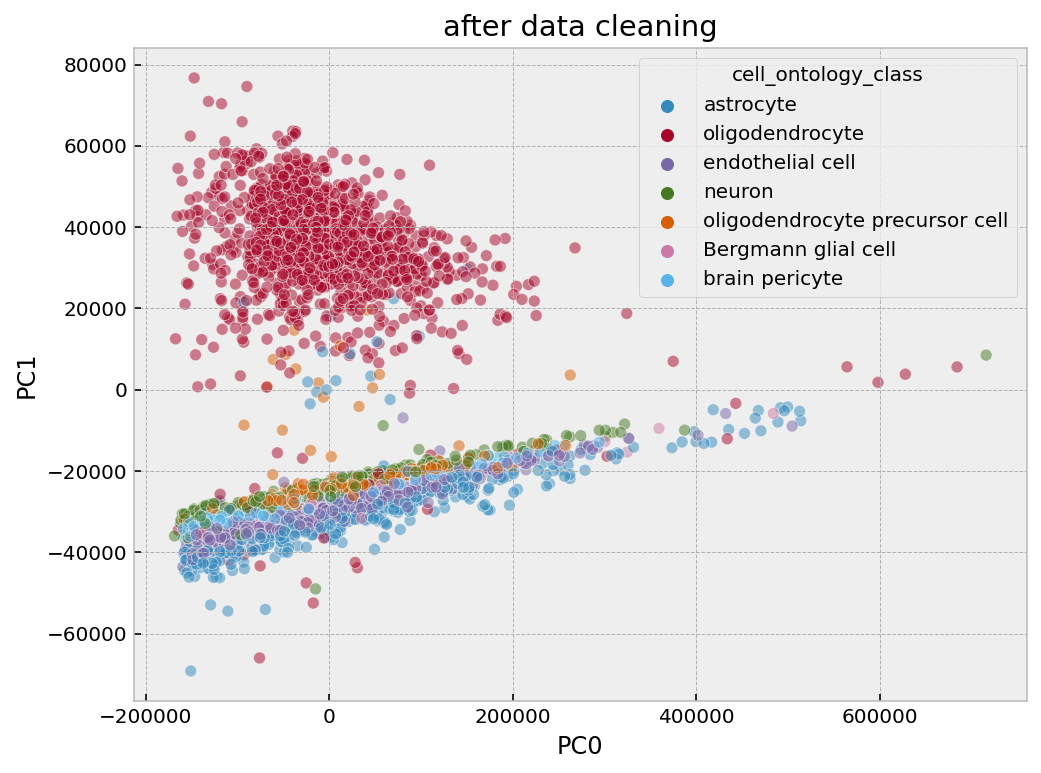

In [19]:
X_pca = pca.transform(X)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.5, hue=meta_ok.cell_ontology_class)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('after data cleaning');

The similar stretched out shape of the clusters for non-oligodendrocytes suggests that their variance along PC0 may be similarly dominated by a few genes.

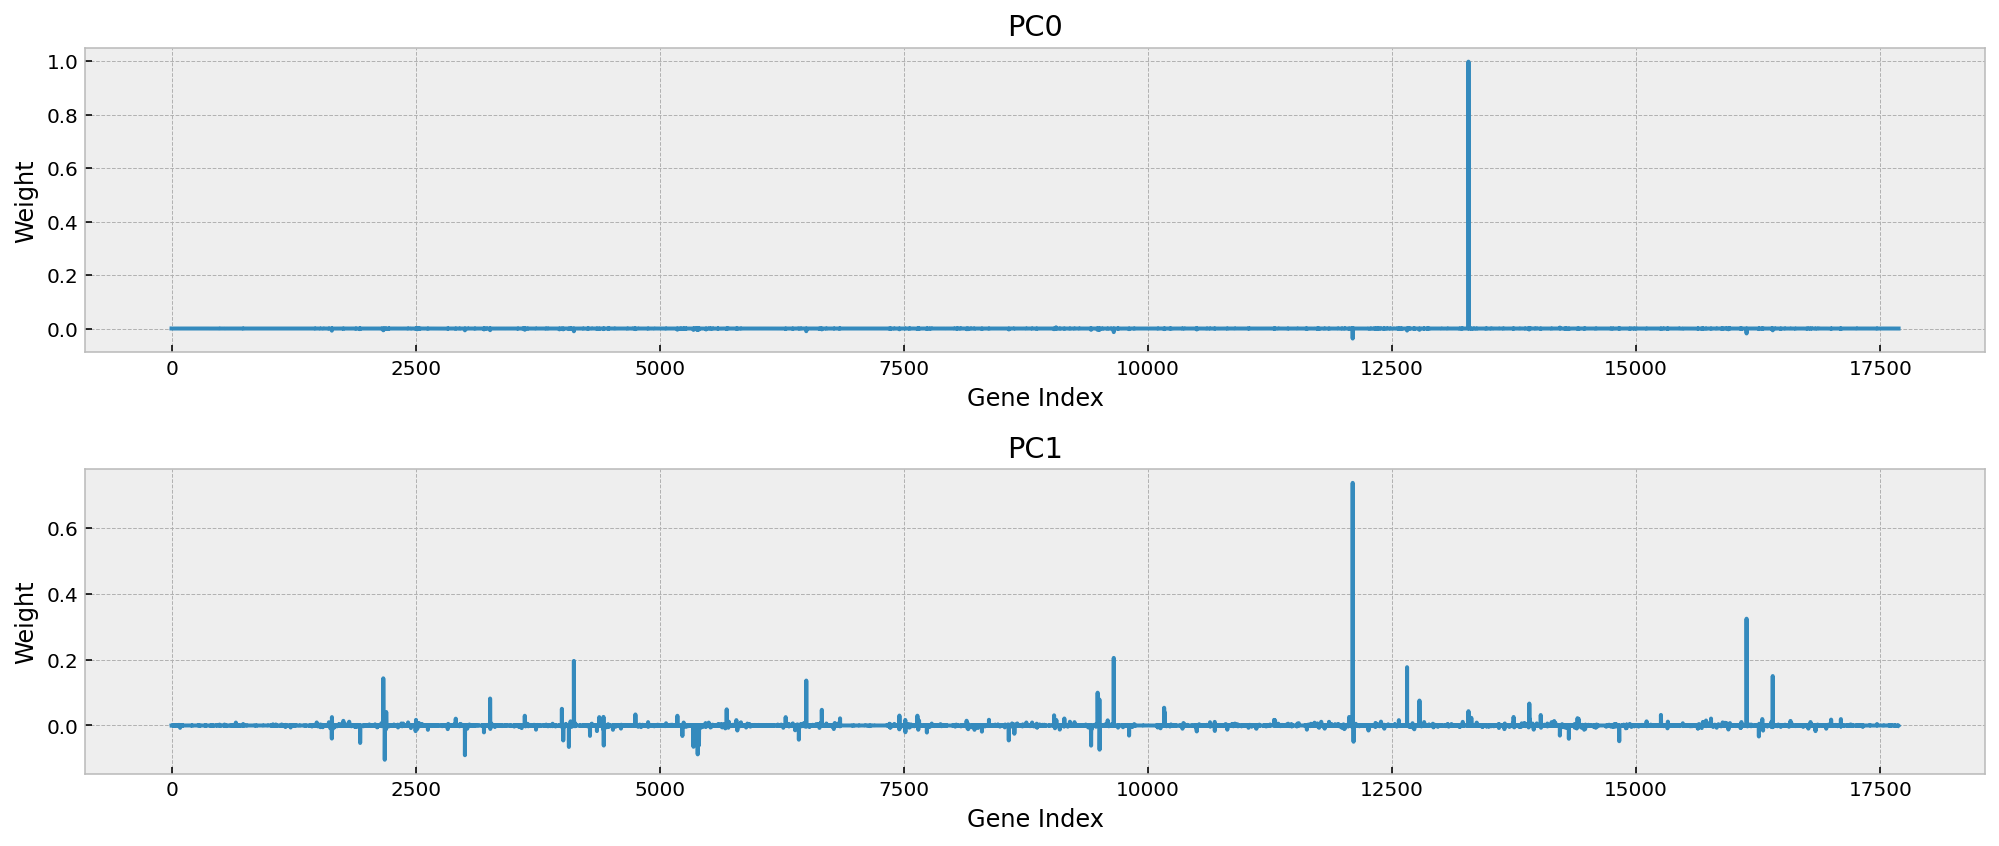

In [20]:
plt.figure(figsize=(14, 6))
x = np.arange(pca.components_.shape[1])
for i in [0, 1]:
    plt.subplot(2,1,i+1)
    plt.plot(x, pca.components_[i,:], '-')
    # plt.xticks(x, df.columns, rotation='vertical')
    plt.xlabel('Gene Index')
    plt.ylabel('Weight')
    plt.title(f'PC{i}')
plt.tight_layout();

A single gene is dominating PC0.

This may simply be because this gene is highly expressed, in which case PCA will be dominated by it and any other very high expressing genes.

If we want to use PCA to distinguish between variation in the rest of the genes, we can simply remove the highly expressing gene.

In [21]:
ind = np.argmax(pca.components_[0,:])
data_ok.columns[ind]

'Rn45s'

In [22]:
data_ok_no_Rn45s = data_ok.iloc[:,data_ok.columns != "Rn45s"]

data_ok.shape, data_ok_no_Rn45s.shape

((3246, 17689), (3246, 17688))

Repeat PCA without Rn45s.

In [23]:
X = data_ok_no_Rn45s.to_numpy()

pca = PCA(2)
pca.fit(X)

PCA(n_components=2)

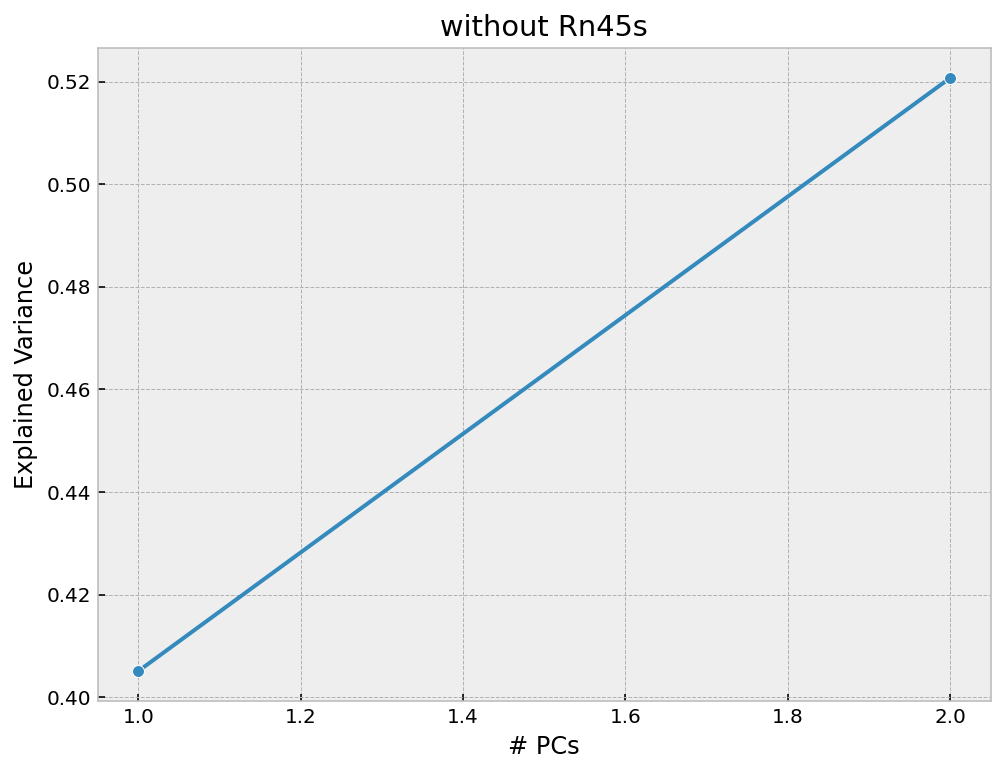

In [24]:
numPC = np.arange(1, pca.n_components_ + 1)
plt.plot(numPC, np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('# PCs')
plt.ylabel('Explained Variance')
plt.title('without Rn45s');

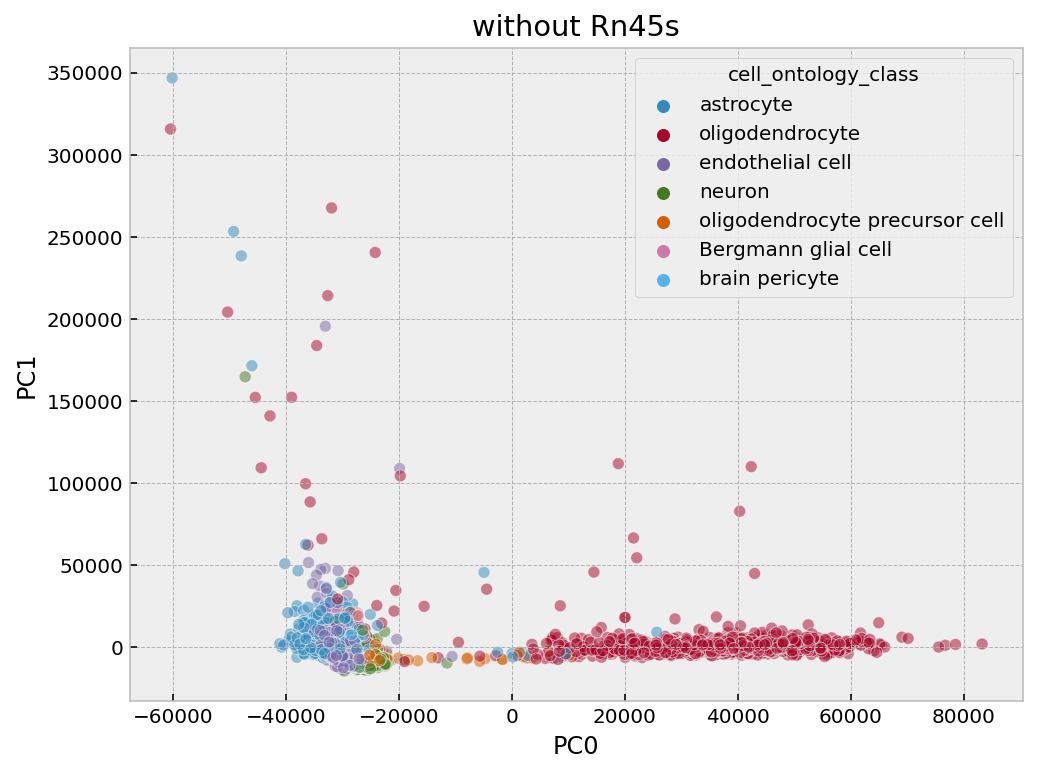

In [25]:
X_pca = pca.transform(X)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.5, hue=meta_ok.cell_ontology_class)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('without Rn45s');

So removing the sinlge very highly expressed gene brought to the fore variations in less highly expressed genes.

But the analysis is still biased towards genes that are more highly expressed.

To remove this bias and focus only on the relative variation in the genes you can standardize the expression columns for each gene (no need to remove Rn45s).

In [26]:
# log scaling makes distributions more similar to a Gaussian
# and +1 maps 0 expr to 0 after log
X = np.log(data_ok.to_numpy() + 1)
Xs = (X - X.mean(axis=0)) / X.std(axis=0)

pca = PCA(2)
pca.fit(Xs)

PCA(n_components=2)

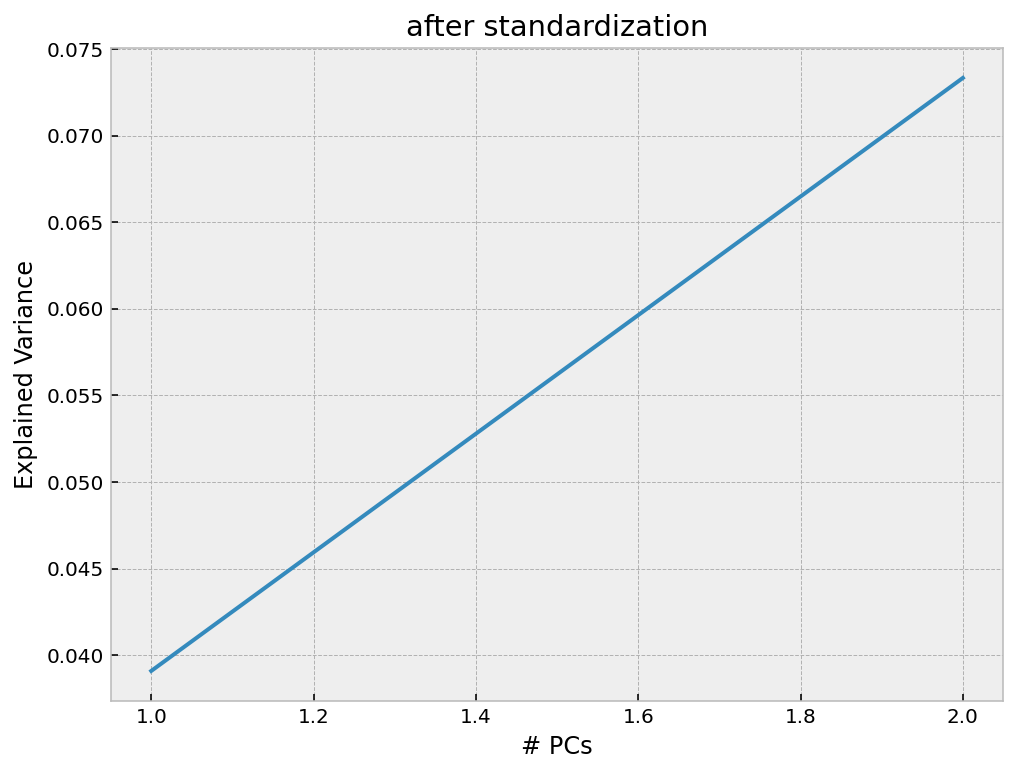

In [27]:
numPC = np.arange(1, pca.n_components_ + 1)
plt.plot(numPC, np.cumsum(pca.explained_variance_ratio_), '-')
plt.xlabel('# PCs')
plt.ylabel('Explained Variance')
plt.title('after standardization');

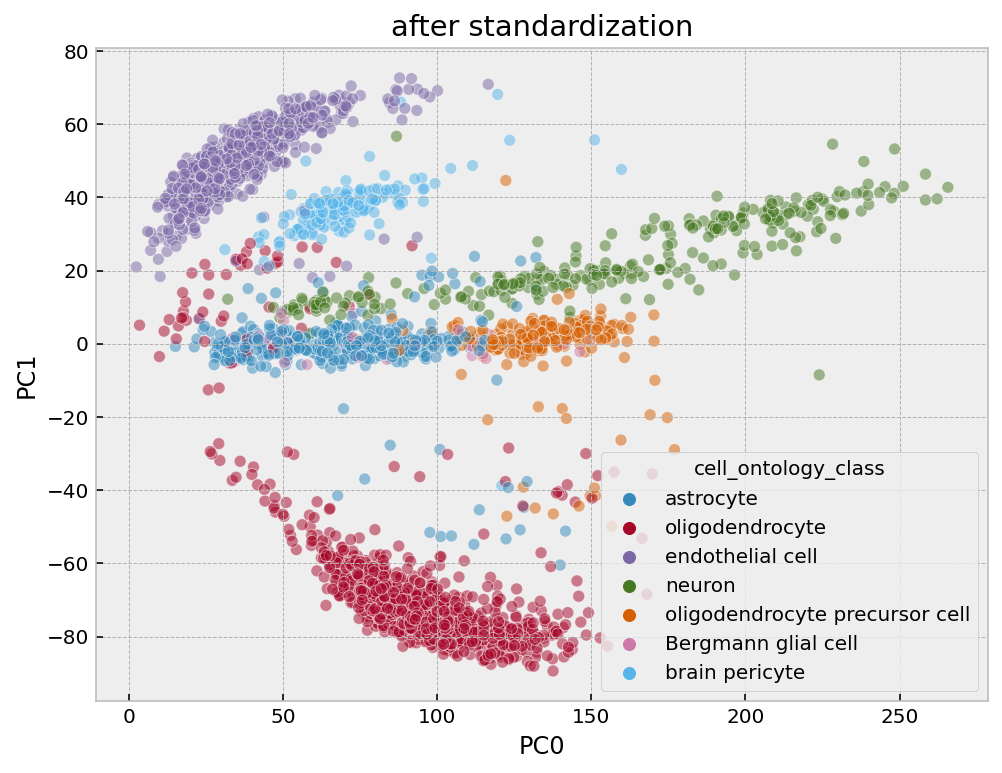

In [28]:
X_pca = pca.transform(X)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.5, hue=meta_ok.cell_ontology_class)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('after standardization');

# Exercise

Assuming you didn't know each cell's type, can you group the cells into clusters that are reasonably associated with their known types? What clustering algorithm might you use?

# t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=2000, init='pca', random_state=0)

Xs_tsne = tsne.fit_transform(Xs)

Xs.shape, Xs_tsne.shape

/Users/marcel/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


((3246, 17689), (3246, 2))

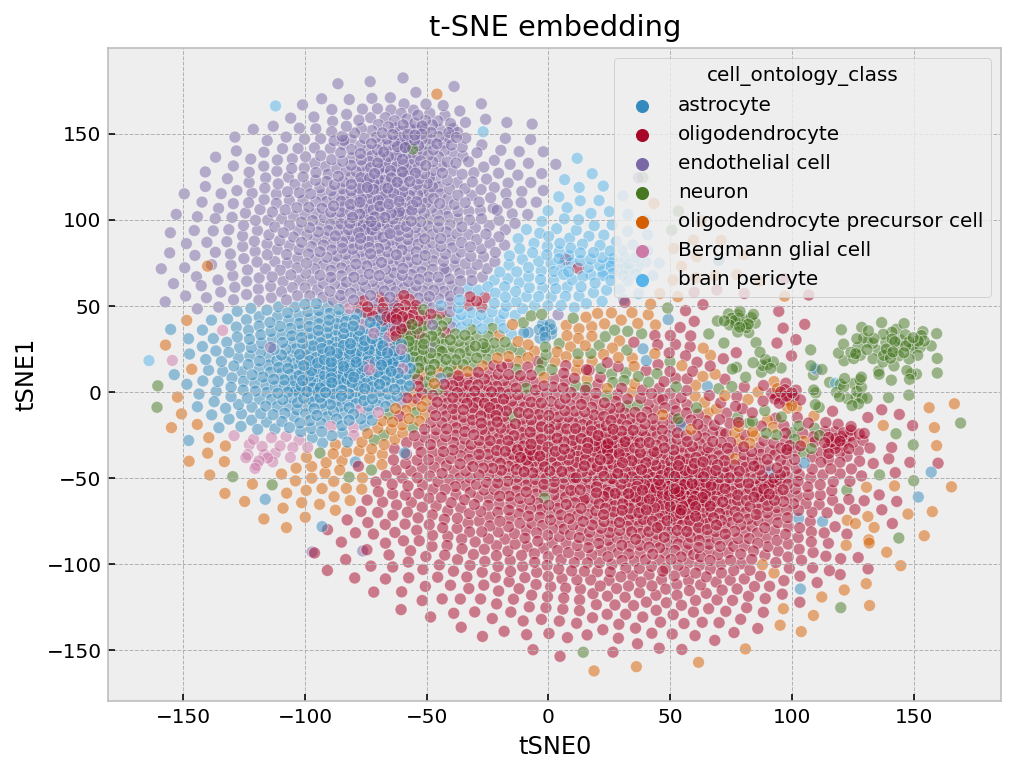

In [30]:
sns.scatterplot(x=Xs_tsne[:,0], y=Xs_tsne[:,1], alpha=0.5, hue=meta_ok.cell_ontology_class)
plt.xlabel('tSNE0')
plt.ylabel('tSNE1')
plt.title('t-SNE embedding');

Try a different `learning_rate`.

/Users/marcel/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


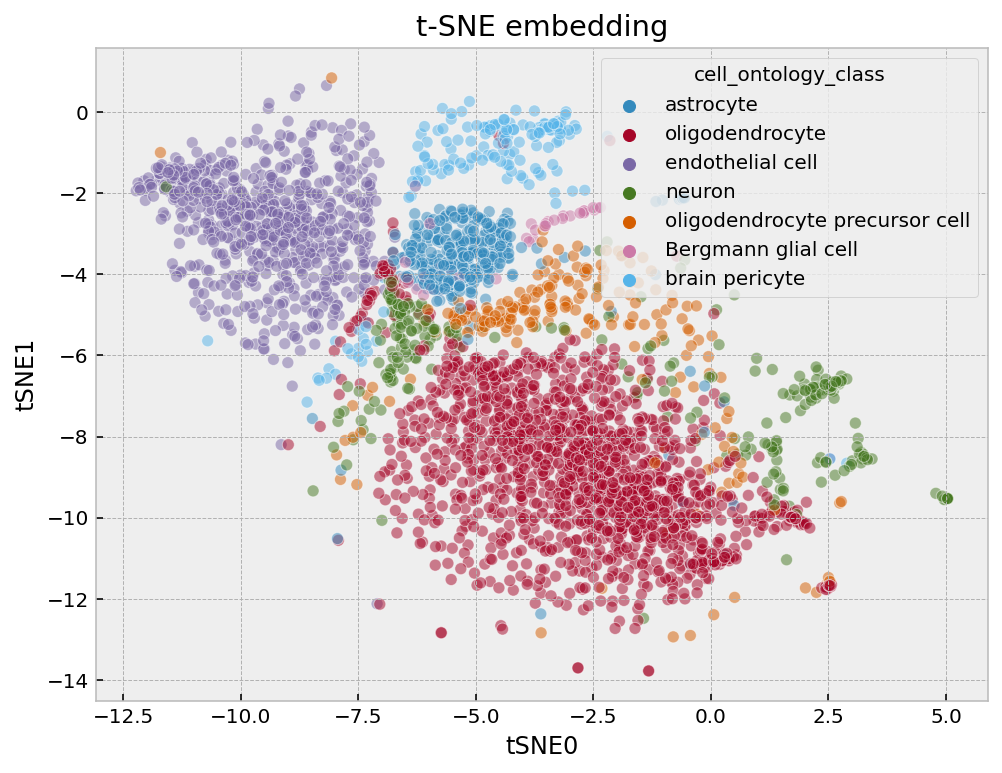

In [31]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca', random_state=0)

Xs_tsne = tsne.fit_transform(Xs)

sns.scatterplot(x=Xs_tsne[:,0], y=Xs_tsne[:,1], alpha=0.5, hue=meta_ok.cell_ontology_class)
plt.xlabel('tSNE0')
plt.ylabel('tSNE1')
plt.title('t-SNE embedding');

Check out https://distill.pub/2016/misread-tsne/ for a discussion of t-SNE hyperparameters.

# UMAP (Uniform Approximation and Projection)

`conda install -c conda-forge umap-learn`

Note: I had to downgrade numpy to version 1.20 due to a dependency mismatch.

`conda install numpy=1.20`

In [32]:
from umap import UMAP

umap = UMAP(n_components=2, n_neighbors=15, min_dist=0.001, metric='euclidean', random_state=0)

umap.fit(Xs)

Xs_umap = umap.transform(Xs)

Xs.shape, Xs_umap.shape

((3246, 17689), (3246, 2))

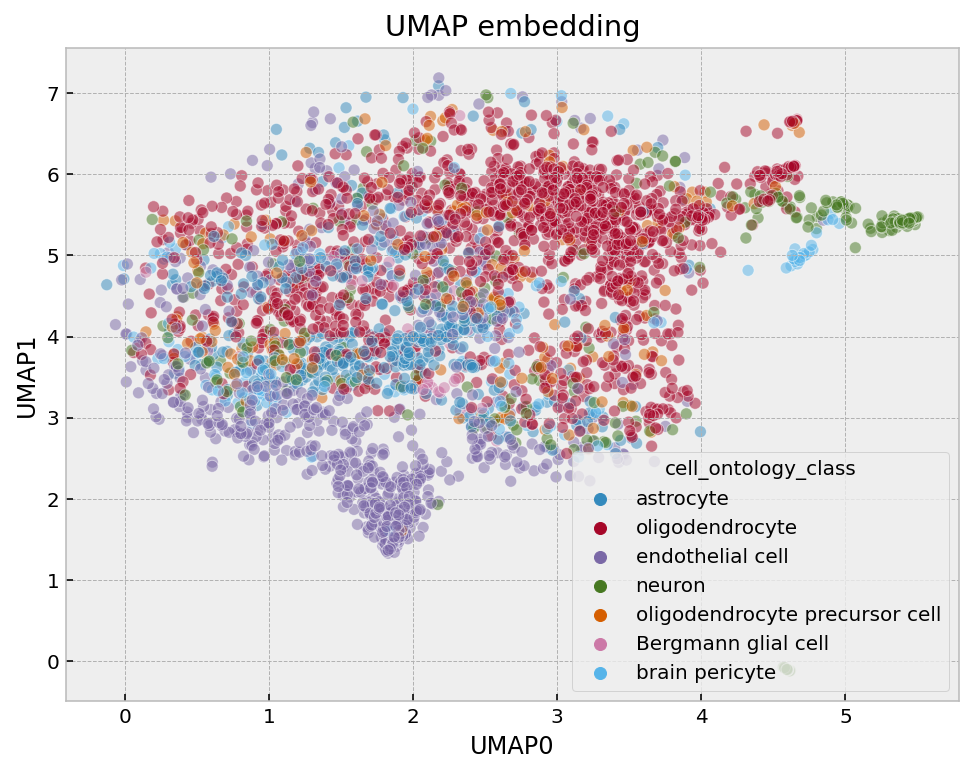

In [33]:
sns.scatterplot(x=Xs_umap[:,0], y=Xs_umap[:,1], alpha=0.5, hue=meta_ok.cell_ontology_class)
plt.xlabel('UMAP0')
plt.ylabel('UMAP1')
plt.title('UMAP embedding');

# LDA (Linear Discriminant Analysis)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)

Xs_lda = lda.fit_transform(Xs, meta_ok.cell_ontology_class)

Xs.shape, Xs_lda.shape

((3246, 17689), (3246, 2))

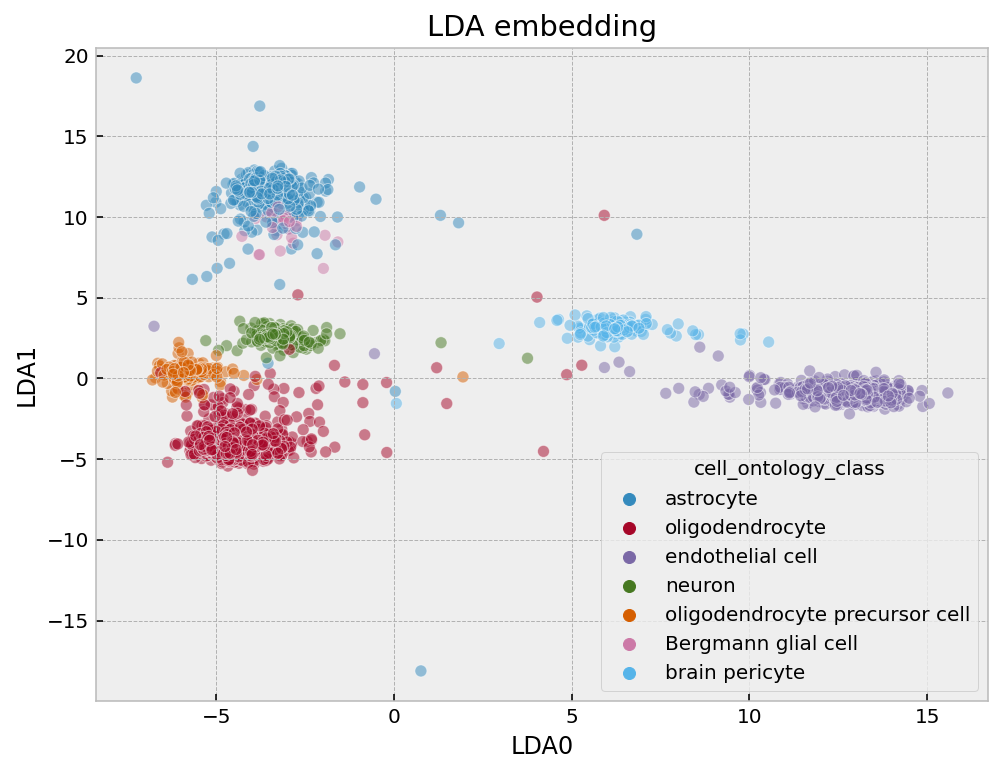

In [35]:
sns.scatterplot(x=Xs_lda[:,0], y=Xs_lda[:,1], alpha=0.5, hue=meta_ok.cell_ontology_class)
plt.xlabel('LDA0')
plt.ylabel('LDA1')
plt.title('LDA embedding');